# Intro to Machine learning

What is Machine learning? How it is connected to AI? (Artificial Inteklligence)

Machine learning is family of algorithms to solving a problems. 
The name suggest that the Machine actually learns, means that we are not specifying a concret algorithm or way to come up with the result. We just giving input values and expecting an output. Based on the output we give feedback to the "machine" if it was good or bad. Doing this iteratively the machine can solve the problem with high precision.


The following table studys the price of the Californian hauses.
Or in other words: Here is a house with these parameter, how much is it worth?
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [1]:
from sklearn import datasets
import pandas as pd


def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    print(sklearn_dataset['DESCR'])

    return df

df = sklearn_to_df(datasets.fetch_california_housing())
df.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


A feladat, hogy a rendelkezésre álló több ezer mintából, ahol pl. a szobák száma, vagy a környék populációja, vagy éppen elhelyezkedése szerepel. A cél hogy ezekből az adatokból az árat meghatározzuk, olyan ingatlanok esetében, amik **nem is szerepelnek ebben a táblázatban**!

dependent variable - a target, amit ki szeretnék számolni, vagy másképp: ez a label
independent variable, vagy feature -ami alatt itt a többi oszlopot kell érteni, ezek segítségével próbálok valami kapcsolatot felfedezni

In [8]:
from sklearn.model_selection  import train_test_split

y = df['target']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = df.iloc[:,0:8]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )

(14448, 8) (6192, 8) (14448,) (6192,)


LinearRegression()

## Evaluating the Model Results
- You have fit a model. 
- You can now store this model, save the object to disk, or evaluate it with different outcomes. 
- Trained regression objects have coefficients (`coef_`) and intercepts (`intercept_`) as attributes. 
- R-Squared is determined from the `score` method of the regression object.
- For Regression, we are going to use the coefficient of determination as our way of evaluating the results, [also referred to as R-Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [9]:
print('labels\n',X.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Coefficients: 
 [ 4.46773975e-01  9.18409990e-03 -1.18116775e-01  6.42290879e-01
 -9.37026507e-06 -4.08535934e-03 -4.09023312e-01 -4.23419564e-01]
Intercept: 
 -36.01222888765239
R2 for Train) 0.6112941337977225
R2 for Test (cross validation) 0.5926087785518774


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, cv=8) 
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: [0.62103167 0.59662386 0.61043628 0.6056347  0.60150524 0.58696177
 0.60222179 0.62946324] 
 R2_avg: 0.61 (+/- 0.03)


In [11]:
X_test['target_REG']=lm.predict(X_test)
X_test['target'] = y_test
X_test[['target', 'target_REG']].head()

,target,target_REG
14740,1.369,2.270267
10101,2.413,2.790599
20566,2.007,1.909848
2670,0.725,1.031605
15709,4.600,2.980156


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

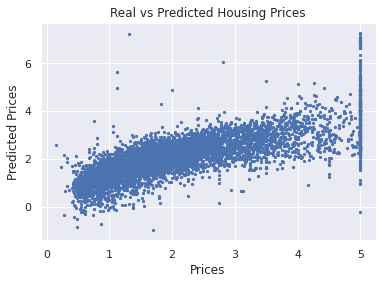

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( X_test['target'], X_test['target_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

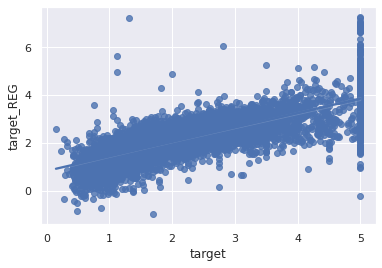

In [14]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="target", y="target_REG", data=X_test[['target','target_REG']])

# This is a dataset - in a form of a table

In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Simplest linear regression - predicting X

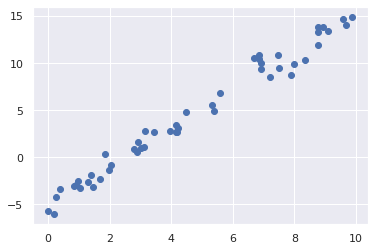

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

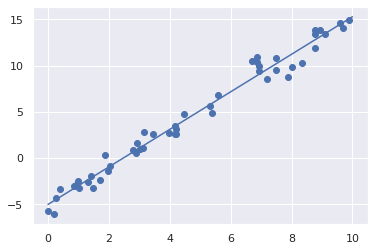

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

2 oszlopos táblázat az X értékre megmondja az Y-t

In [19]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
      

--2022-09-21 09:49:06--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.003s  

2022-09-21 09:49:06 (16.8 MB/s) - ‘titanic.csv’ saved [60302/60302]



# Titanic survival dataset

In this dataset our target  the "survived" column. Splitting the dataset to test and training data always the first. We could investigate if someone was late to board the ship, would he/she survived or not? We could also investigate the pattern what are the most relevant attributes leading to survive

For the solution we are not using regression, because we are not looking for a value, but looking for a class. The class of the survivel. Our target data is actually a binary 0,1. Our task is to divede the data set to this two class.
It is called a classificatiuon task.

We could technically use decision tree to solve it.

All our tasks starts with some data engineering. Filling up the missing data, if possible, th eirrelevant columns should be removed, like here the name.
And all data should be a number.
The Age or the weights are numbers and technically we could multiple them, or make any mathematical operation with it. Not like with ID or ZIP code.
Text data can be groupped and classified, or there are techniques called one-hot encoding or embeddings..

```
Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
```

In [20]:
titanic = pd.read_csv("/content/titanic.csv")

# Who are the survivals?

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Linear regression, decesion tree, SVM, Naive Bayes and many other classical algorythm exists to solve this issue

We not using any of them we are going to use Neural Networks.

# MNIST Hand written digits

MNIST is one of the most popular dataset to start the journey to deep learning. 
http://yann.lecun.com/exdb/mnist/
https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/

Just for demonstartion purpose we displaying the data as a table, like the housing or the titanic dataset.
The dataset contains a few thousands 28x28 pixel hand written images. Each pixel has a value between 0.255. That shows how bright that pixel. The 255 is the most brightest therefore it is white.

Table has 28x28 = 784 column for each pixel, plus a target column that has the label or target. So all together it is a table with 785 column.
The task is to classify them into 10 groups.

The pixels are already numbers

In generally we use Neural nets if we have too many dimensions, attribute, columns - these are synonims in this case.

Without Neural nets a problem with too many dimension had to be first reduce with different technics such as PCA.

In [23]:
!wget https://storage.googleapis.com/mledu-datasets/mnist_test.csv -O /tmp/mnist_train_small.csv

--2022-09-21 09:59:07--  https://storage.googleapis.com/mledu-datasets/mnist_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘/tmp/mnist_train_small.csv’

/tmp/mnist_train_sm 100%[===================>]  17.44M  74.7MB/s    in 0.2s    

2022-09-21 09:59:08 (74.7 MB/s) - ‘/tmp/mnist_train_small.csv’ saved [18289443/18289443]



In [24]:
mnist_dataframe = pd.read_csv("/tmp/mnist_train_small.csv", sep=",")

In [ ]:
mnist_dataframe.iloc[1, 1:785]

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Name: 1, Length: 784, dtype: int64

In [25]:
mnist_dataframe.iloc[:,200:300]

,0.199,0.200,0.201,84,185,159,151,60,36,0.202,...,0.251,0.252,17,66,14,67.1,67.2,67.3,59,21
0,0,0,0,0,77,251,210,25,0,0,...,0,0,0,76,247,253,231,63,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,32,254,216,0,0
2,0,0,0,0,0,0,0,110,190,251,...,221,253,251,251,251,147,77,62,128,251
3,0,0,0,0,0,0,4,195,231,0,...,247,53,0,0,0,0,0,0,0,18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,134,254,254,180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,64,255,255,255,255,255,255,...,0,0,0,0,0,0,0,64,255,255
9995,0,0,0,58,240,254,254,254,254,254,...,0,0,0,0,207,254,254,251,68,0
9996,0,0,0,0,0,0,0,2,116,254,...,168,254,254,189,0,0,0,62,236,254
9997,0,0,0,0,0,0,0,0,0,0,...,0,71,252,254,254,254,254,254,254,254


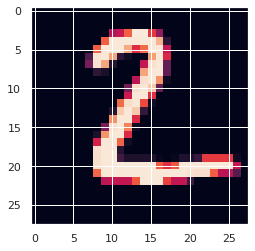

In [28]:
import numpy as np

array = np.array(mnist_dataframe.iloc[0, 1:785])

array.shape
plt.imshow(array.reshape(28,28))